<a href="https://colab.research.google.com/github/JitheshPavan/Data-Science-Intern---Coding-task/blob/main/Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Dataset Loading

In [ ]:
# !gdown

!unzip -q Assigment_dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1cJmmWGIcGHyROA_HimTrlmUqw5G8tEcq
To: /content/Assigment_dataset.zip
100% 14.4M/14.4M [00:00<00:00, 20.2MB/s]


Downloading Model

In [ ]:
!wget https://raw.githubusercontent.com/JitheshPavan/Data-Science-Intern---Coding-task/main/best.pt

In [ ]:
!pip -q install ultralytics
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.1 MB/s eta 0:00:00


# Dataset Visualization

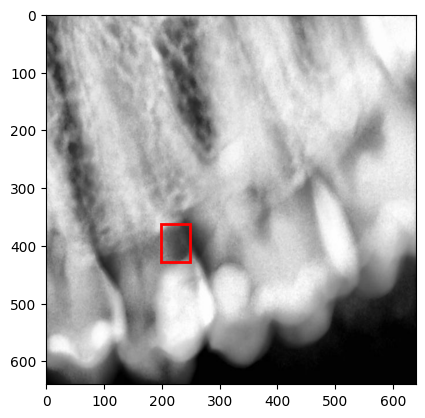

In [ ]:
import os
os.chdir('Assigment_dataset')

import random

image_path='images/'
images = [f for f in os.listdir(image_path)]

selected_image = random.choice(images)
selected_label = selected_image.replace(".jpg", ".txt")
selected_label='labels/' + selected_label

with open(selected_label, 'r') as file:
    # Read the content and split it by space or newline
    coords = [float(i) for i in file.read().split()[1:]]


from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load image
im = Image.open(image_path + selected_image)

# Image dimensions
image_width, image_height = im.size

# YOLO normalized coordinates
x_center = float(coords[0]) * image_width
y_center = float(coords[1]) * image_height
bbox_width = float(coords[2]) * image_width
bbox_height = float(coords[3]) * image_height

# Convert center coordinates to top-left corner
x_min_pixel = x_center - bbox_width / 2
y_min_pixel = y_center - bbox_height / 2

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle((x_min_pixel, y_min_pixel),
                         bbox_width,
                         bbox_height,
                         edgecolor='r',
                         facecolor='none',
                         linewidth=2)

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

os.chdir('/content/')


# Main Functions

Input:
    image_path, results.


In [ ]:
def object_detection(image_path,model):
  results = model(image_path)
  for r in results:
      r.show()

  return results

In [ ]:
def segmentation(image_path,results):
  bboxes=results[0].boxes.xyxy
  # Load the image
  image = Image.open(image_path)
  cropped_images=[]
  for crop_box in bboxes:
      # Convert to integers since pixels can't be float
      left, top, right, bottom = map(int, crop_box)
      cropped_images.append( np.array(image.crop((left, top, right, bottom))))

  for img in cropped_images:
    k_means_algo(img)

def k_means_algo(img):
  # Reshape to (num_pixels, 1) where each pixel is a data point
  pixels = img.reshape(-1, 1)
  vectorized = np.float32(pixels)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

  K = 3
  attempts=10
  ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  result_image = res.reshape((img.shape))


  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1),
  plt.imshow(img)
  plt.title('Original Image'),
  plt.xticks([]), plt.yticks([])

  plt.subplot(1,2,2)
  plt.imshow(result_image)
  plt.title('Segmented Image, K = %i' % K)
  plt.xticks([]), plt.yticks([])
  plt.show()

# Inference

*Functions:</br>



**object_detection(image_path, model)</br>**


Performs object detection (OB) on the given image.</br>
Parameters:</br>

*  image_path: Path to the input image.</br>

*  model: Object detection model.</br>

Returns:</br>
* Detection results</br>

**segmentation(image_path, results)</br>**</br>
Performs image segmentation on detected objects.</br>

Parameters:</br>
* image_path  Path to the input image.</br>
* results: Output from object_detection().</br>
Returns:</br>
* Segmented regions of detected objects.</br>

**Usage**</br>
Call object_detection(image_path, model).</br>
Pass its output to segmentation(image_path, results)





In [ ]:
model_path='best.pt'
from ultralytics import YOLO
model = YOLO(model_path)

In [ ]:
import random


image 1/1 /content/Assigment_dataset/images/image_5908.jpg: 640x640 1 cavity, 665.4ms
Speed: 3.4ms preprocess, 665.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


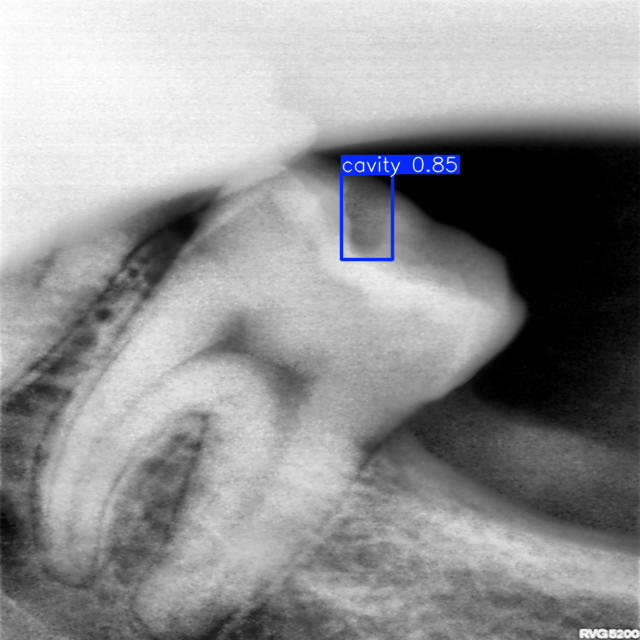

In [ ]:
image_path= 'Assigment_dataset/images/'+ random.choice(os.listdir('Assigment_dataset/images/'))
results=object_detection(image_path,model)

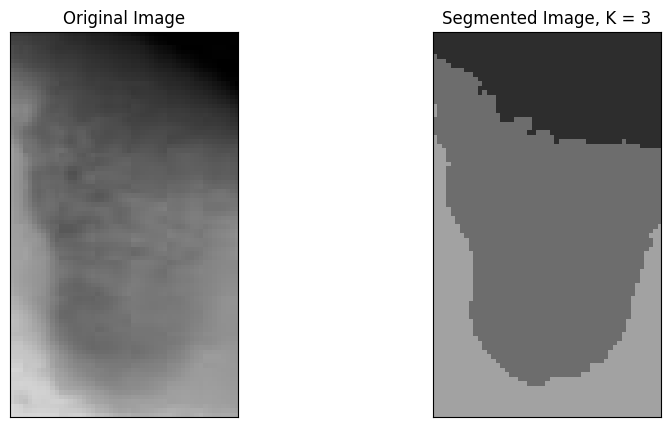

In [ ]:
segmentation(image_path,results)